<a href="https://colab.research.google.com/github/inachenyx/painClassify/blob/main/painClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
 %pip install scikit-plot
 %pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you ha

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [97]:
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.tree import plot_tree

In [98]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.datasets import make_blobs

In [99]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA

In [100]:
# meta-estimator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Upload data file from local

In [2]:
from google.colab import files
uploaded = files.upload()

Saving allfeature.mat to allfeature (1).mat


In [3]:
# Optional: check uploaded files
import os
os.listdir()

['.config', 'allfeature.mat', 'allfeature (1).mat', 'sample_data']

### Load matlab input data, shape: (20 subjects × 48 samples each = 960 total, 78 features)

In [4]:
data1= loadmat('allfeature.mat')
data1 # type(data1) = dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Mar 30 10:22:32 2023',
 '__version__': '1.0',
 '__globals__': [],
 'allfeature': array([[ 166.81395914,  -79.06271678,    5.39222803, ...,    1.15384664,
            1.19508644,    0.78083541],
        [ 101.32687949,  -94.98415466,   -1.83584695, ...,    1.14931862,
            1.23364202,    0.88269087],
        [ 128.91419997, -159.19282596,    2.09217151, ...,    1.30164211,
            1.2970149 ,    0.81681964],
        ...,
        [  21.25685769,  -20.27615109,   -1.15525676, ...,    0.7101134 ,
            0.47663037,    0.35536794],
        [  18.63807482,  -18.97140068,    0.88943484, ...,    0.58694835,
            0.51154476,    0.3140685 ],
        [  17.79520915,  -23.31899865,   -0.47494661, ...,    0.76536606,
            0.51354686,    0.32751652]])}

In [5]:
finaldata=np.array(data1['allfeature'])
finaldata.shape

(960, 78)

### Fill in a dictionary called "featuremap" with names of 39* 2chs = 78 features, and make a list for future use

In [6]:
feature=['max','min','mean','med','peak','arv','var','std','kurtosis','skewness','rms',
         'rs','rmsa','waveformF','peakF','impulseF','clearanceF','FC','MSF','RMSF','VF',
         'RVF','SKMean','SKStd','SKSkewness','SKKurtosis','psdE','svdpE','eE','ApEn',
         'SpEn','FuzzyEn','PeEn','enveEn','detaDE','thetaDE','alphaDE','betaDE','gammaDE']
featuremap= {} # dict{index:'str'}
for i in range(0, 78):
    if i<=38:
        featuremap[i]=feature[i]+'_ch1'
    else:
        featuremap[i] = feature[i-39] + '_ch2'
print(featuremap)

{0: 'max_ch1', 1: 'min_ch1', 2: 'mean_ch1', 3: 'med_ch1', 4: 'peak_ch1', 5: 'arv_ch1', 6: 'var_ch1', 7: 'std_ch1', 8: 'kurtosis_ch1', 9: 'skewness_ch1', 10: 'rms_ch1', 11: 'rs_ch1', 12: 'rmsa_ch1', 13: 'waveformF_ch1', 14: 'peakF_ch1', 15: 'impulseF_ch1', 16: 'clearanceF_ch1', 17: 'FC_ch1', 18: 'MSF_ch1', 19: 'RMSF_ch1', 20: 'VF_ch1', 21: 'RVF_ch1', 22: 'SKMean_ch1', 23: 'SKStd_ch1', 24: 'SKSkewness_ch1', 25: 'SKKurtosis_ch1', 26: 'psdE_ch1', 27: 'svdpE_ch1', 28: 'eE_ch1', 29: 'ApEn_ch1', 30: 'SpEn_ch1', 31: 'FuzzyEn_ch1', 32: 'PeEn_ch1', 33: 'enveEn_ch1', 34: 'detaDE_ch1', 35: 'thetaDE_ch1', 36: 'alphaDE_ch1', 37: 'betaDE_ch1', 38: 'gammaDE_ch1', 39: 'max_ch2', 40: 'min_ch2', 41: 'mean_ch2', 42: 'med_ch2', 43: 'peak_ch2', 44: 'arv_ch2', 45: 'var_ch2', 46: 'std_ch2', 47: 'kurtosis_ch2', 48: 'skewness_ch2', 49: 'rms_ch2', 50: 'rs_ch2', 51: 'rmsa_ch2', 52: 'waveformF_ch2', 53: 'peakF_ch2', 54: 'impulseF_ch2', 55: 'clearanceF_ch2', 56: 'FC_ch2', 57: 'MSF_ch2', 58: 'RMSF_ch2', 59: 'VF_ch2'

In [7]:
featurename = list(featuremap.values())
# featurename=list(df_allfeature) # this gives you a list of df column names
print(featurename)

['max_ch1', 'min_ch1', 'mean_ch1', 'med_ch1', 'peak_ch1', 'arv_ch1', 'var_ch1', 'std_ch1', 'kurtosis_ch1', 'skewness_ch1', 'rms_ch1', 'rs_ch1', 'rmsa_ch1', 'waveformF_ch1', 'peakF_ch1', 'impulseF_ch1', 'clearanceF_ch1', 'FC_ch1', 'MSF_ch1', 'RMSF_ch1', 'VF_ch1', 'RVF_ch1', 'SKMean_ch1', 'SKStd_ch1', 'SKSkewness_ch1', 'SKKurtosis_ch1', 'psdE_ch1', 'svdpE_ch1', 'eE_ch1', 'ApEn_ch1', 'SpEn_ch1', 'FuzzyEn_ch1', 'PeEn_ch1', 'enveEn_ch1', 'detaDE_ch1', 'thetaDE_ch1', 'alphaDE_ch1', 'betaDE_ch1', 'gammaDE_ch1', 'max_ch2', 'min_ch2', 'mean_ch2', 'med_ch2', 'peak_ch2', 'arv_ch2', 'var_ch2', 'std_ch2', 'kurtosis_ch2', 'skewness_ch2', 'rms_ch2', 'rs_ch2', 'rmsa_ch2', 'waveformF_ch2', 'peakF_ch2', 'impulseF_ch2', 'clearanceF_ch2', 'FC_ch2', 'MSF_ch2', 'RMSF_ch2', 'VF_ch2', 'RVF_ch2', 'SKMean_ch2', 'SKStd_ch2', 'SKSkewness_ch2', 'SKKurtosis_ch2', 'psdE_ch2', 'svdpE_ch2', 'eE_ch2', 'ApEn_ch2', 'SpEn_ch2', 'FuzzyEn_ch2', 'PeEn_ch2', 'enveEn_ch2', 'detaDE_ch2', 'thetaDE_ch2', 'alphaDE_ch2', 'betaDE_ch

### Fill in a 960 x 78 dataframe of all features, with feature names as column names

In [8]:
df_allfeature=pd.DataFrame({})
for i in range(0,78):
    df_allfeature[featuremap[i]] = pd.Series(finaldata[:, i])
    # df[col_names] = pd.Series(the ith column containing 960 samples)
df_allfeature

,max_ch1,min_ch1,mean_ch1,med_ch1,peak_ch1,arv_ch1,var_ch1,std_ch1,kurtosis_ch1,skewness_ch1,...,ApEn_ch2,SpEn_ch2,FuzzyEn_ch2,PeEn_ch2,enveEn_ch2,detaDE_ch2,thetaDE_ch2,alphaDE_ch2,betaDE_ch2,gammaDE_ch2
0,166.813959,-79.062717,5.392228,-2.790309,245.876676,31.815987,1999.976058,44.721092,4.844295,1.179407,...,0.350624,0.301076,0.598355,0.522379,4.623539,2.021805,1.412648,1.153847,1.195086,0.780835
1,101.326879,-94.984155,-1.835847,-3.340101,196.311034,26.283139,1129.996915,33.615427,3.598552,0.265602,...,0.481794,0.415872,0.713874,0.530019,5.750126,1.859100,1.367031,1.149319,1.233642,0.882691
2,128.914200,-159.192826,2.092172,3.487677,288.107026,37.435054,2757.651426,52.513345,4.082916,-0.443398,...,0.362679,0.308449,0.630355,0.491129,6.229014,2.147117,1.549756,1.301642,1.297015,0.816820
3,78.484714,-84.640134,0.558508,1.751326,163.124848,18.385297,650.759739,25.509993,4.368423,-0.563057,...,0.534825,0.492856,0.758778,0.540971,6.739344,1.905882,1.350514,1.263958,1.261828,0.939012
4,36.634978,-38.879940,-1.243194,-0.542321,75.514918,13.298590,251.816790,15.868736,2.157331,-0.070203,...,0.733398,0.731609,0.925257,0.516819,6.777355,1.616098,1.309684,1.188875,1.307632,0.852297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,145.554952,-101.799048,-1.658257,0.320772,247.354000,18.669120,1239.296886,35.203649,9.103476,0.654275,...,0.583391,0.536555,0.456086,0.579752,6.188255,1.283101,0.795118,0.707301,0.498281,0.312393
956,29.599243,-27.424078,0.823647,0.785650,57.023321,8.065363,113.058761,10.632909,3.148662,-0.232453,...,0.676366,0.639097,0.547314,0.555430,5.840478,1.196891,0.743416,0.767468,0.616204,0.376129
957,21.256858,-20.276151,-1.155257,-0.334651,41.533009,6.706247,67.108205,8.191960,2.533418,0.062741,...,0.466711,0.414441,0.395870,0.558672,5.940841,1.087394,0.788022,0.710113,0.476630,0.355368
958,18.638075,-18.971401,0.889435,1.318910,37.609475,6.502409,64.967912,8.060267,2.696328,-0.400734,...,0.598940,0.561447,0.471818,0.572417,5.723889,1.238492,0.768567,0.586948,0.511545,0.314068


### Make a list of labels, and append to the end of df_allfeatures

In [42]:
labels = []
for subj in range(20): # 20 subjects in total, each has 48 segments
    if subj < 7:
        labels += ["mild"] * 48
    elif subj < 14:
        labels += ["moderate"] * 48
    else:
        labels += ["severe"] * 48
# same as: labels = ["mild"]*336 + ["moderate"]*336 + ["severe"]*288

In [43]:
df_allfeature['class'] = pd.Series(labels)

df_allfeature

,max_ch1,min_ch1,mean_ch1,med_ch1,peak_ch1,arv_ch1,var_ch1,std_ch1,kurtosis_ch1,skewness_ch1,...,SpEn_ch2,FuzzyEn_ch2,PeEn_ch2,enveEn_ch2,detaDE_ch2,thetaDE_ch2,alphaDE_ch2,betaDE_ch2,gammaDE_ch2,class
0,166.813959,-79.062717,5.392228,-2.790309,245.876676,31.815987,1999.976058,44.721092,4.844295,1.179407,...,0.301076,0.598355,0.522379,4.623539,2.021805,1.412648,1.153847,1.195086,0.780835,mild
1,101.326879,-94.984155,-1.835847,-3.340101,196.311034,26.283139,1129.996915,33.615427,3.598552,0.265602,...,0.415872,0.713874,0.530019,5.750126,1.859100,1.367031,1.149319,1.233642,0.882691,mild
2,128.914200,-159.192826,2.092172,3.487677,288.107026,37.435054,2757.651426,52.513345,4.082916,-0.443398,...,0.308449,0.630355,0.491129,6.229014,2.147117,1.549756,1.301642,1.297015,0.816820,mild
3,78.484714,-84.640134,0.558508,1.751326,163.124848,18.385297,650.759739,25.509993,4.368423,-0.563057,...,0.492856,0.758778,0.540971,6.739344,1.905882,1.350514,1.263958,1.261828,0.939012,mild
4,36.634978,-38.879940,-1.243194,-0.542321,75.514918,13.298590,251.816790,15.868736,2.157331,-0.070203,...,0.731609,0.925257,0.516819,6.777355,1.616098,1.309684,1.188875,1.307632,0.852297,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,145.554952,-101.799048,-1.658257,0.320772,247.354000,18.669120,1239.296886,35.203649,9.103476,0.654275,...,0.536555,0.456086,0.579752,6.188255,1.283101,0.795118,0.707301,0.498281,0.312393,severe
956,29.599243,-27.424078,0.823647,0.785650,57.023321,8.065363,113.058761,10.632909,3.148662,-0.232453,...,0.639097,0.547314,0.555430,5.840478,1.196891,0.743416,0.767468,0.616204,0.376129,severe
957,21.256858,-20.276151,-1.155257,-0.334651,41.533009,6.706247,67.108205,8.191960,2.533418,0.062741,...,0.414441,0.395870,0.558672,5.940841,1.087394,0.788022,0.710113,0.476630,0.355368,severe
958,18.638075,-18.971401,0.889435,1.318910,37.609475,6.502409,64.967912,8.060267,2.696328,-0.400734,...,0.561447,0.471818,0.572417,5.723889,1.238492,0.768567,0.586948,0.511545,0.314068,severe


### From the complete feature dataframe, create input X and ground truth y (convert to 0,1,2)

In [45]:
X, y_str = df_allfeature.iloc[:,:-1], df_allfeature.iloc[:, -1]

le= LabelEncoder()
# fit label encoder and return encoded labels (mild-0, moderate-1, severe-2)
y = le.fit_transform(y_str)

<Axes: title={'center': 'Digits Classification Learning Curve'}, xlabel='Training examples', ylabel='Score'>

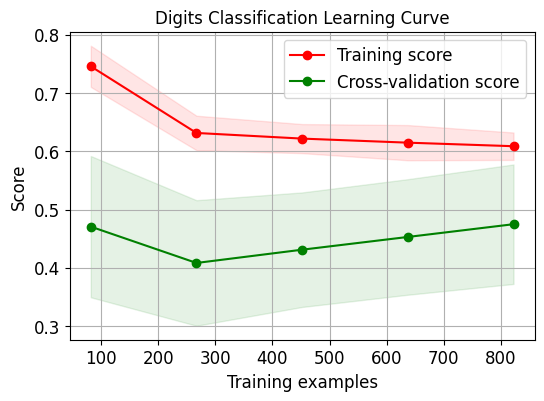

In [46]:
"绘制学习曲线"
skplt.estimators.plot_learning_curve(LogisticRegression(), X, y,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve")

<Axes: title={'center': 'PCA 2-D Projection'}, xlabel='First Principal Component', ylabel='Second Principal Component'>

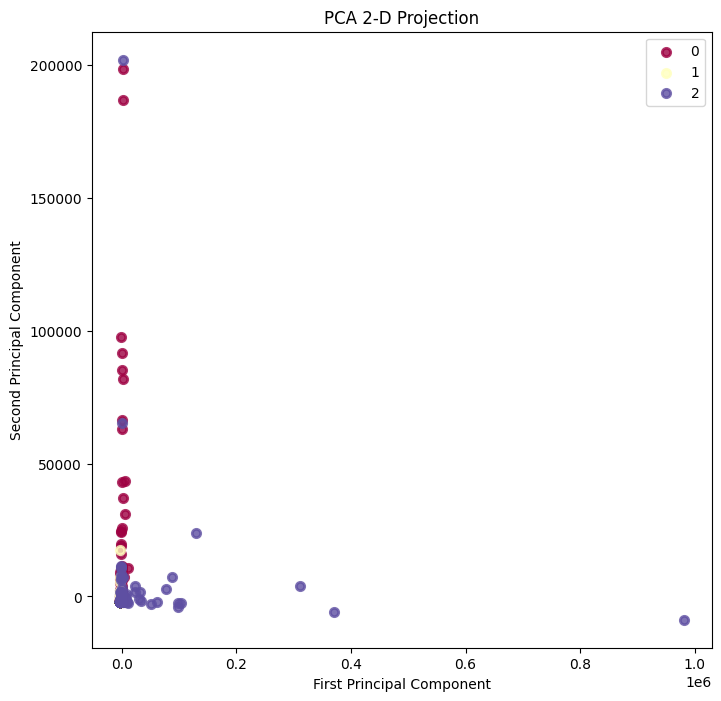

In [49]:
"""pca降维"""
pca=PCA()
pca.fit( X )
skplt.decomposition.plot_pca_2d_projection(pca,X,y,figsize=(8,8))

<Axes: title={'center': 'Feature Importance'}>

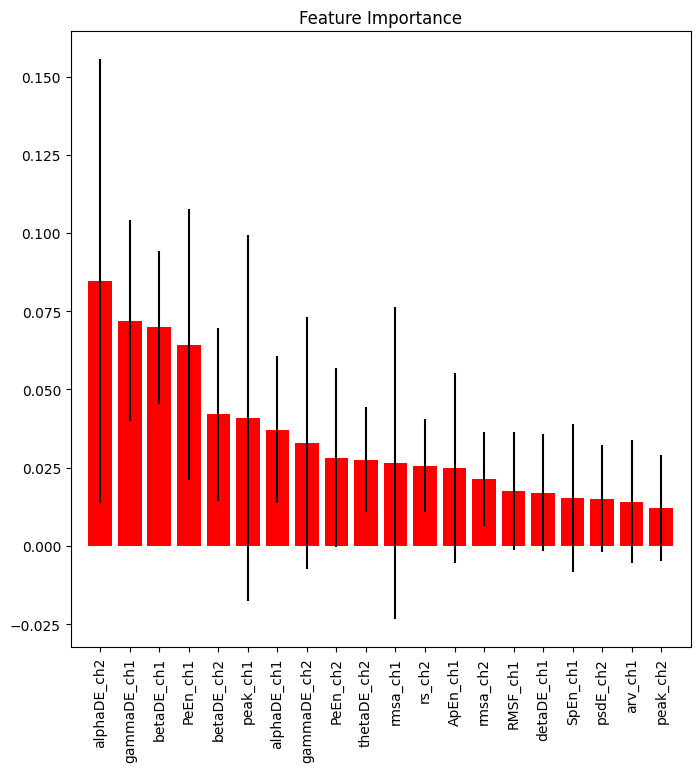

In [51]:
"""特征重要性排序"""
RF = RandomForestClassifier(n_estimators=5, random_state=0, n_jobs=-1)
RF.fit(X,y)
skplt.estimators.plot_feature_importances(RF, feature_names=featurename, x_tick_rotation=90, figsize=(8, 8)) # max_num_features defaults to 20

In [86]:
"""选择特征"""
# Sort the feature dataframe by importance
df_sortedfeature = pd.DataFrame({'columns': featurename, 'importance': RF.feature_importances_}).sort_values(by="importance", ascending=False)
df_sortedfeature # shape (78, 2)

,columns,importance
75,alphaDE_ch2,0.084668
38,gammaDE_ch1,0.072006
37,betaDE_ch1,0.069906
32,PeEn_ch1,0.064242
76,betaDE_ch2,0.042102
...,...,...
3,med_ch1,0.001590
53,peakF_ch2,0.000935
42,med_ch2,0.000470
25,SKKurtosis_ch1,0.000313


In [101]:
# Get the feature names of the top 20 ranked ones
selectFeature = df_sortedfeature.iloc[:20,0].tolist() # len=20
print(selectFeature)

# # Get the indices of the top20 in original feature dataframe
# selectFeatureIndex = df_sortedfeature.index[:20] # Index object
# print(selectFeatureIndex)

# Get the new feature matrix with selected features (20) only (while y(960,1) remains the same)
X = df_allfeature[selectFeature].values # shape (960,20)

# Store the complete feature dataframe in X0
X0 = df_allfeature.values[:,:-1] # all features (960,78)

['alphaDE_ch2', 'gammaDE_ch1', 'betaDE_ch1', 'PeEn_ch1', 'betaDE_ch2', 'peak_ch1', 'alphaDE_ch1', 'gammaDE_ch2', 'PeEn_ch2', 'thetaDE_ch2', 'rmsa_ch1', 'rs_ch2', 'ApEn_ch1', 'rmsa_ch2', 'RMSF_ch1', 'detaDE_ch1', 'SpEn_ch1', 'psdE_ch2', 'arv_ch1', 'peak_ch2']


### Visualize decision tree

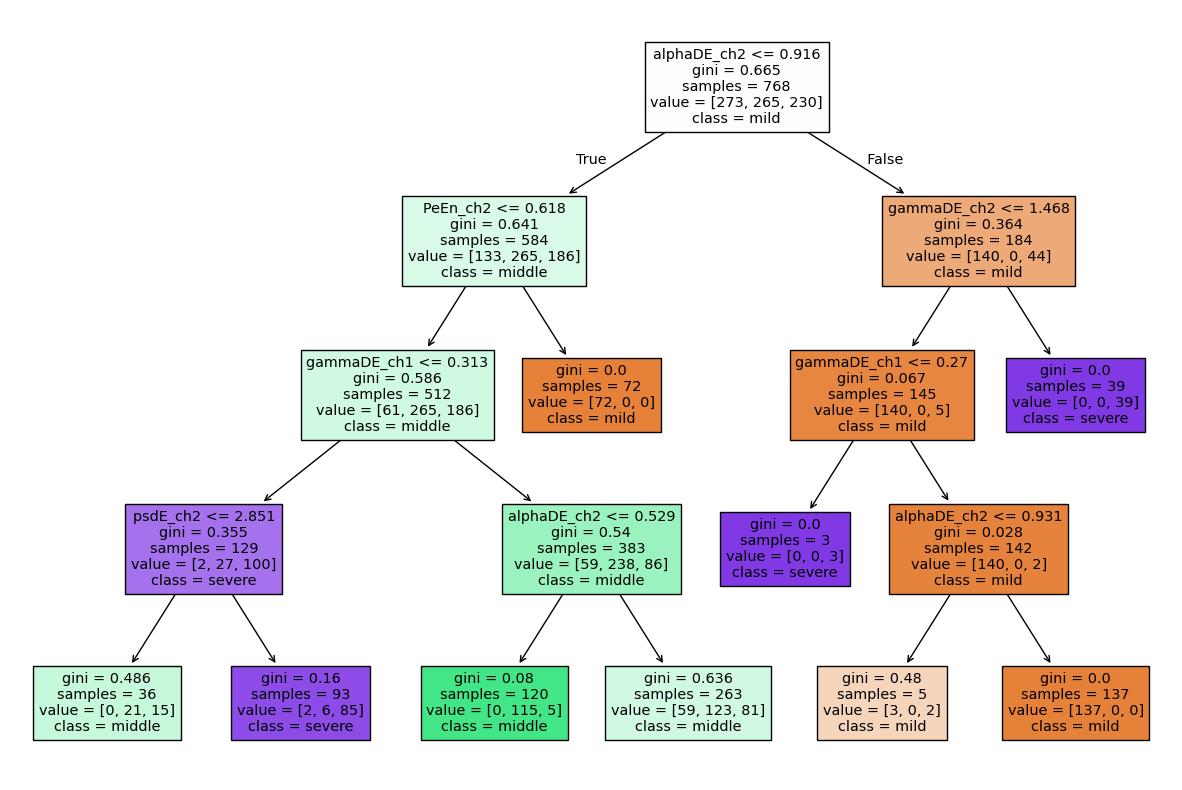

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练决策树模型
decision_tree = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=2, max_depth=4)
decision_tree.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=selectFeature, class_names=["mild", "moderate","severe"])
plt.rcParams['font.size'] = 15  # 设置字体大小
plt.rcParams['text.color'] = 'blue'  # 设置文本颜色
plt.rcParams['axes.labelcolor'] = 'red'  # 设置坐标轴标签颜色

### plot violin diagram

In [ ]:
forviolin_tick=['alphaDE_ch1','gammaDE_ch1','betaDE_ch1','PeEn_ch1','alphaDE_ch2','betaDE_ch2','gammaDE_ch2','PeEn_ch2']

In [84]:
selectFeatureIndex = df_sortedfeature.index[:20] # Index object
type(selectFeatureIndex)

pandas.core.indexes.base.Index

array([[1.1538466406775743, 0.781446162150552, 1.200507721492831, ...,
        2.966926656499867, 31.81598656984205, 292.3522313749441],
       [1.149318621821038, 0.8456590717608006, 1.2255158305124567, ...,
        2.8777856007663316, 26.2831391654868, 210.99498534527575],
       [1.3016421104475746, 0.8161290778175347, 1.2975632115211646, ...,
        2.914799917218314, 37.43505380368053, 302.77274829489204],
       ...,
       [0.7101134007744507, 0.233601680988752, 0.5167862347967644, ...,
        2.6243009548629757, 6.706246596927171, 53.734666270753095],
       [0.5869483481516622, 0.1900399295968433, 0.5179180992435366, ...,
        3.669099953602391, 6.502409195683451, 39.93423285380062],
       [0.7653660590864803, 0.28474907791357595, 0.5639130791727626, ...,
        3.3211024527722612, 6.211909875926134, 58.45339579236775]],
      dtype=object)